<p style="text-align:center;"><span style="font-size:34px;"><span style="color:#7d5eb5;"><span style="font-family:Georgia;"> Clustering countries using socio, economic and health factors </span> </span>  </span></p>

<div style = 'border : 3px solid none; background-color:#cac9cf; padding:10px; color:#7d5eb5'>
In this notebook, I want to implement some clustering algorithms with a dimensionality reduction method on Country Data, which includes countries data like socio, economic and health factors.<br><br>

After, preprocessing and EDA sections I used a dimensionality reduction method which is principal component analysis (PCA) and then I used 3 clustering algorithms such as K-Means, MiniBatchKMeans and Birch to cluster countries for HELP International.<br><br>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.<br><br>

So the purpose is to classify countries and find countries which need more aid.
</div>

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Importing libraries and data</div>

In [1]:
import numpy as np                    # import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings                          # for ignoring warnings
warnings.simplefilter (action = 'ignore')

In [2]:
from sklearn.preprocessing import StandardScaler        # for Scalling

from sklearn.decomposition import PCA                   # for PCA and clustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import Birch

from sklearn.metrics import silhouette_score            # for metrics
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score 

In [3]:
# importing and transforming dataset to dataframe
data = pd.read_csv ("Country-data.csv")
df = pd.DataFrame (data)
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">PreProcessing</div>

In [4]:
df.describe ().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.duplicated ().sum ()

0

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
There isnt any null / duplicated values, unacceptable samples or noises.<br>
    
All the dataset samples looks fine for now<br>
    
In next steps (EDA), i will check more about noises and outliers 
</div>

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden;  font-weight: 500;">Exploratory data analysis (EDA)</div>

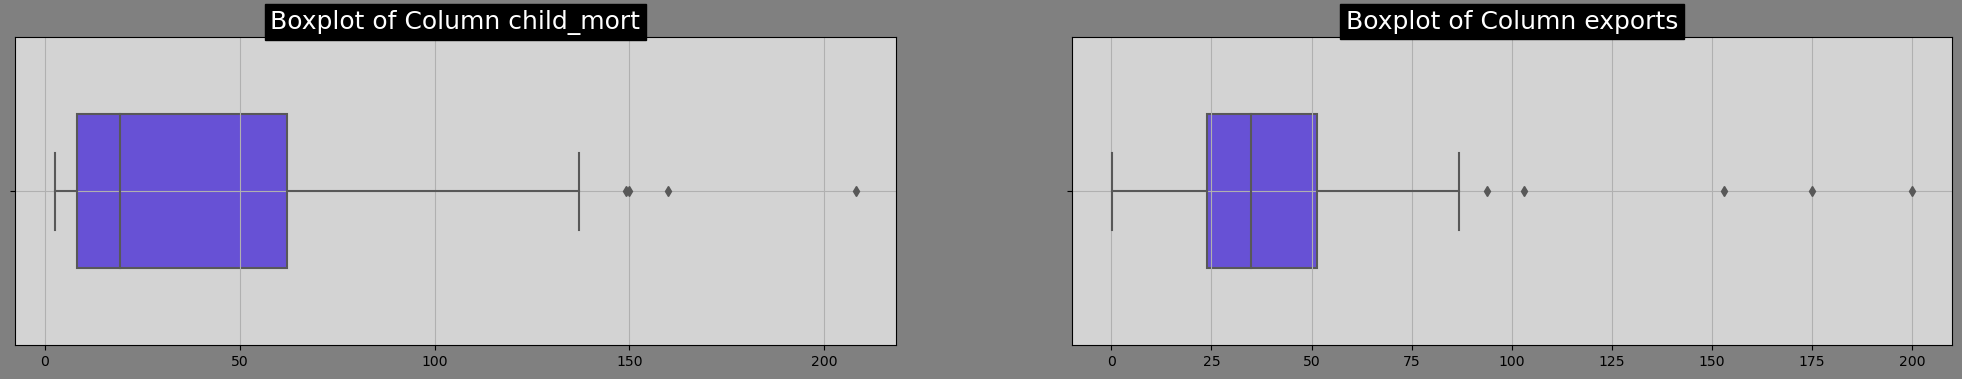

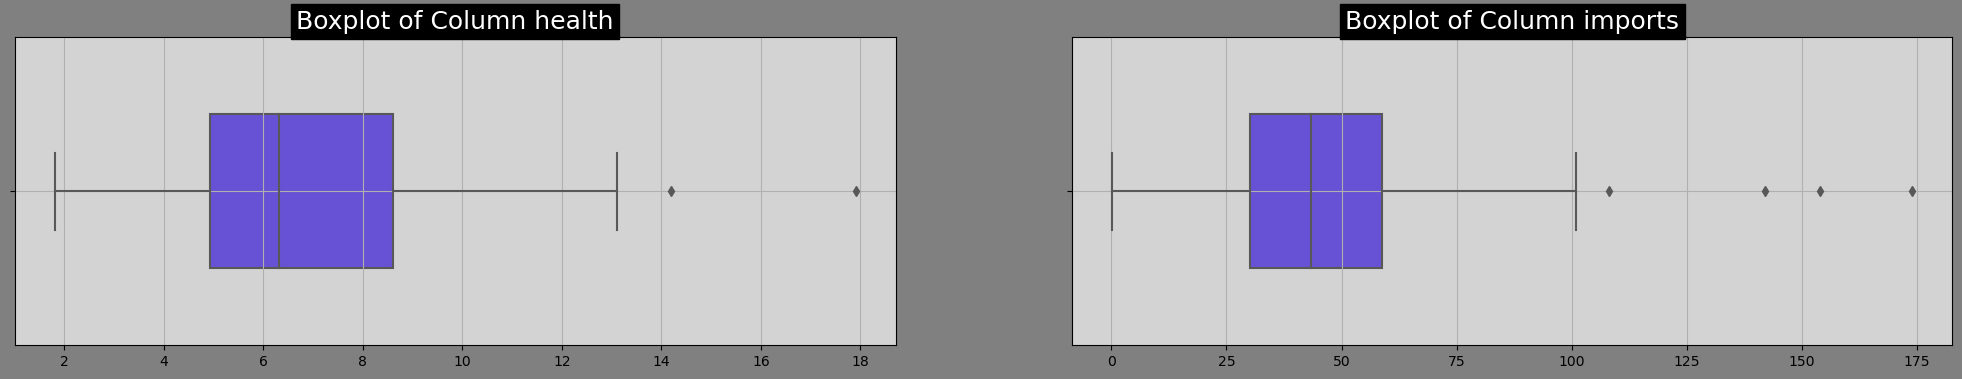

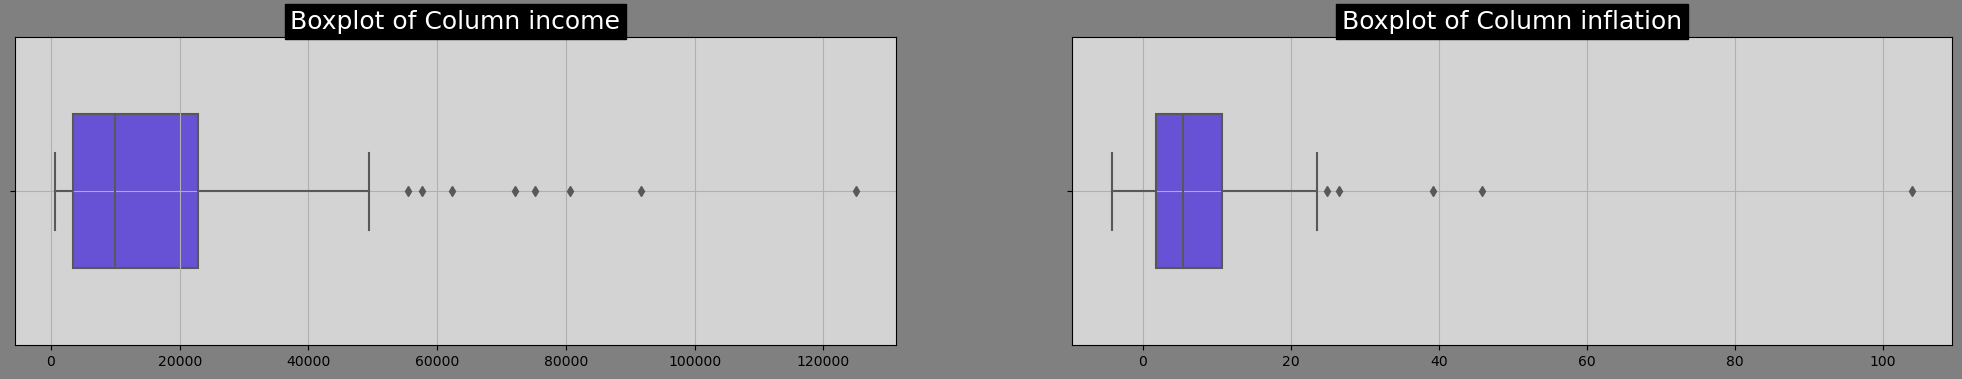

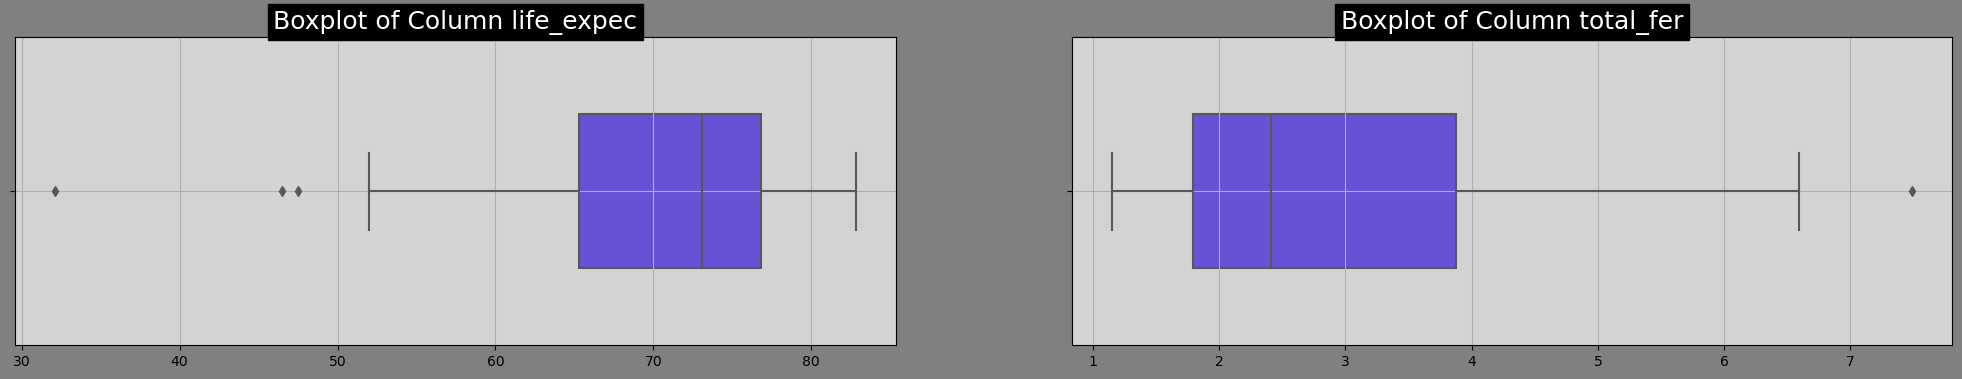

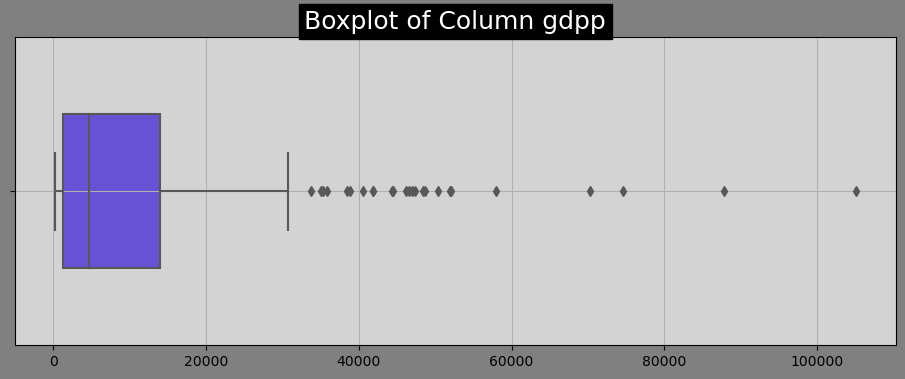

In [8]:
df_box = list (df.drop ("country", axis = 1))   
i =  0
while i < len(df_box):
    fig = plt.figure(figsize = (25, 4), facecolor='gray')
    
    plt.subplot (1 , 2 , 1)
    box = sns.boxplot(x=df_box [i], data=df, color = "#583beb", width=0.5, dodge=True )
    box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
    box.set(xlabel=None)
    box.set_facecolor('lightgrey')
    plt.grid()
    i += 1

    if i < len(df_box):
        plt.subplot (1 , 2 , 2)
        box = sns.boxplot(x=df_box [i], data=df , color = "#583beb", width=0.5, dodge=True )
        box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
        box.set(xlabel=None)
        box.set_facecolor('lightgrey')
        plt.grid()
        i += 1

    plt.show()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
There are some outliers but they are ok and they aren't noise
</div>

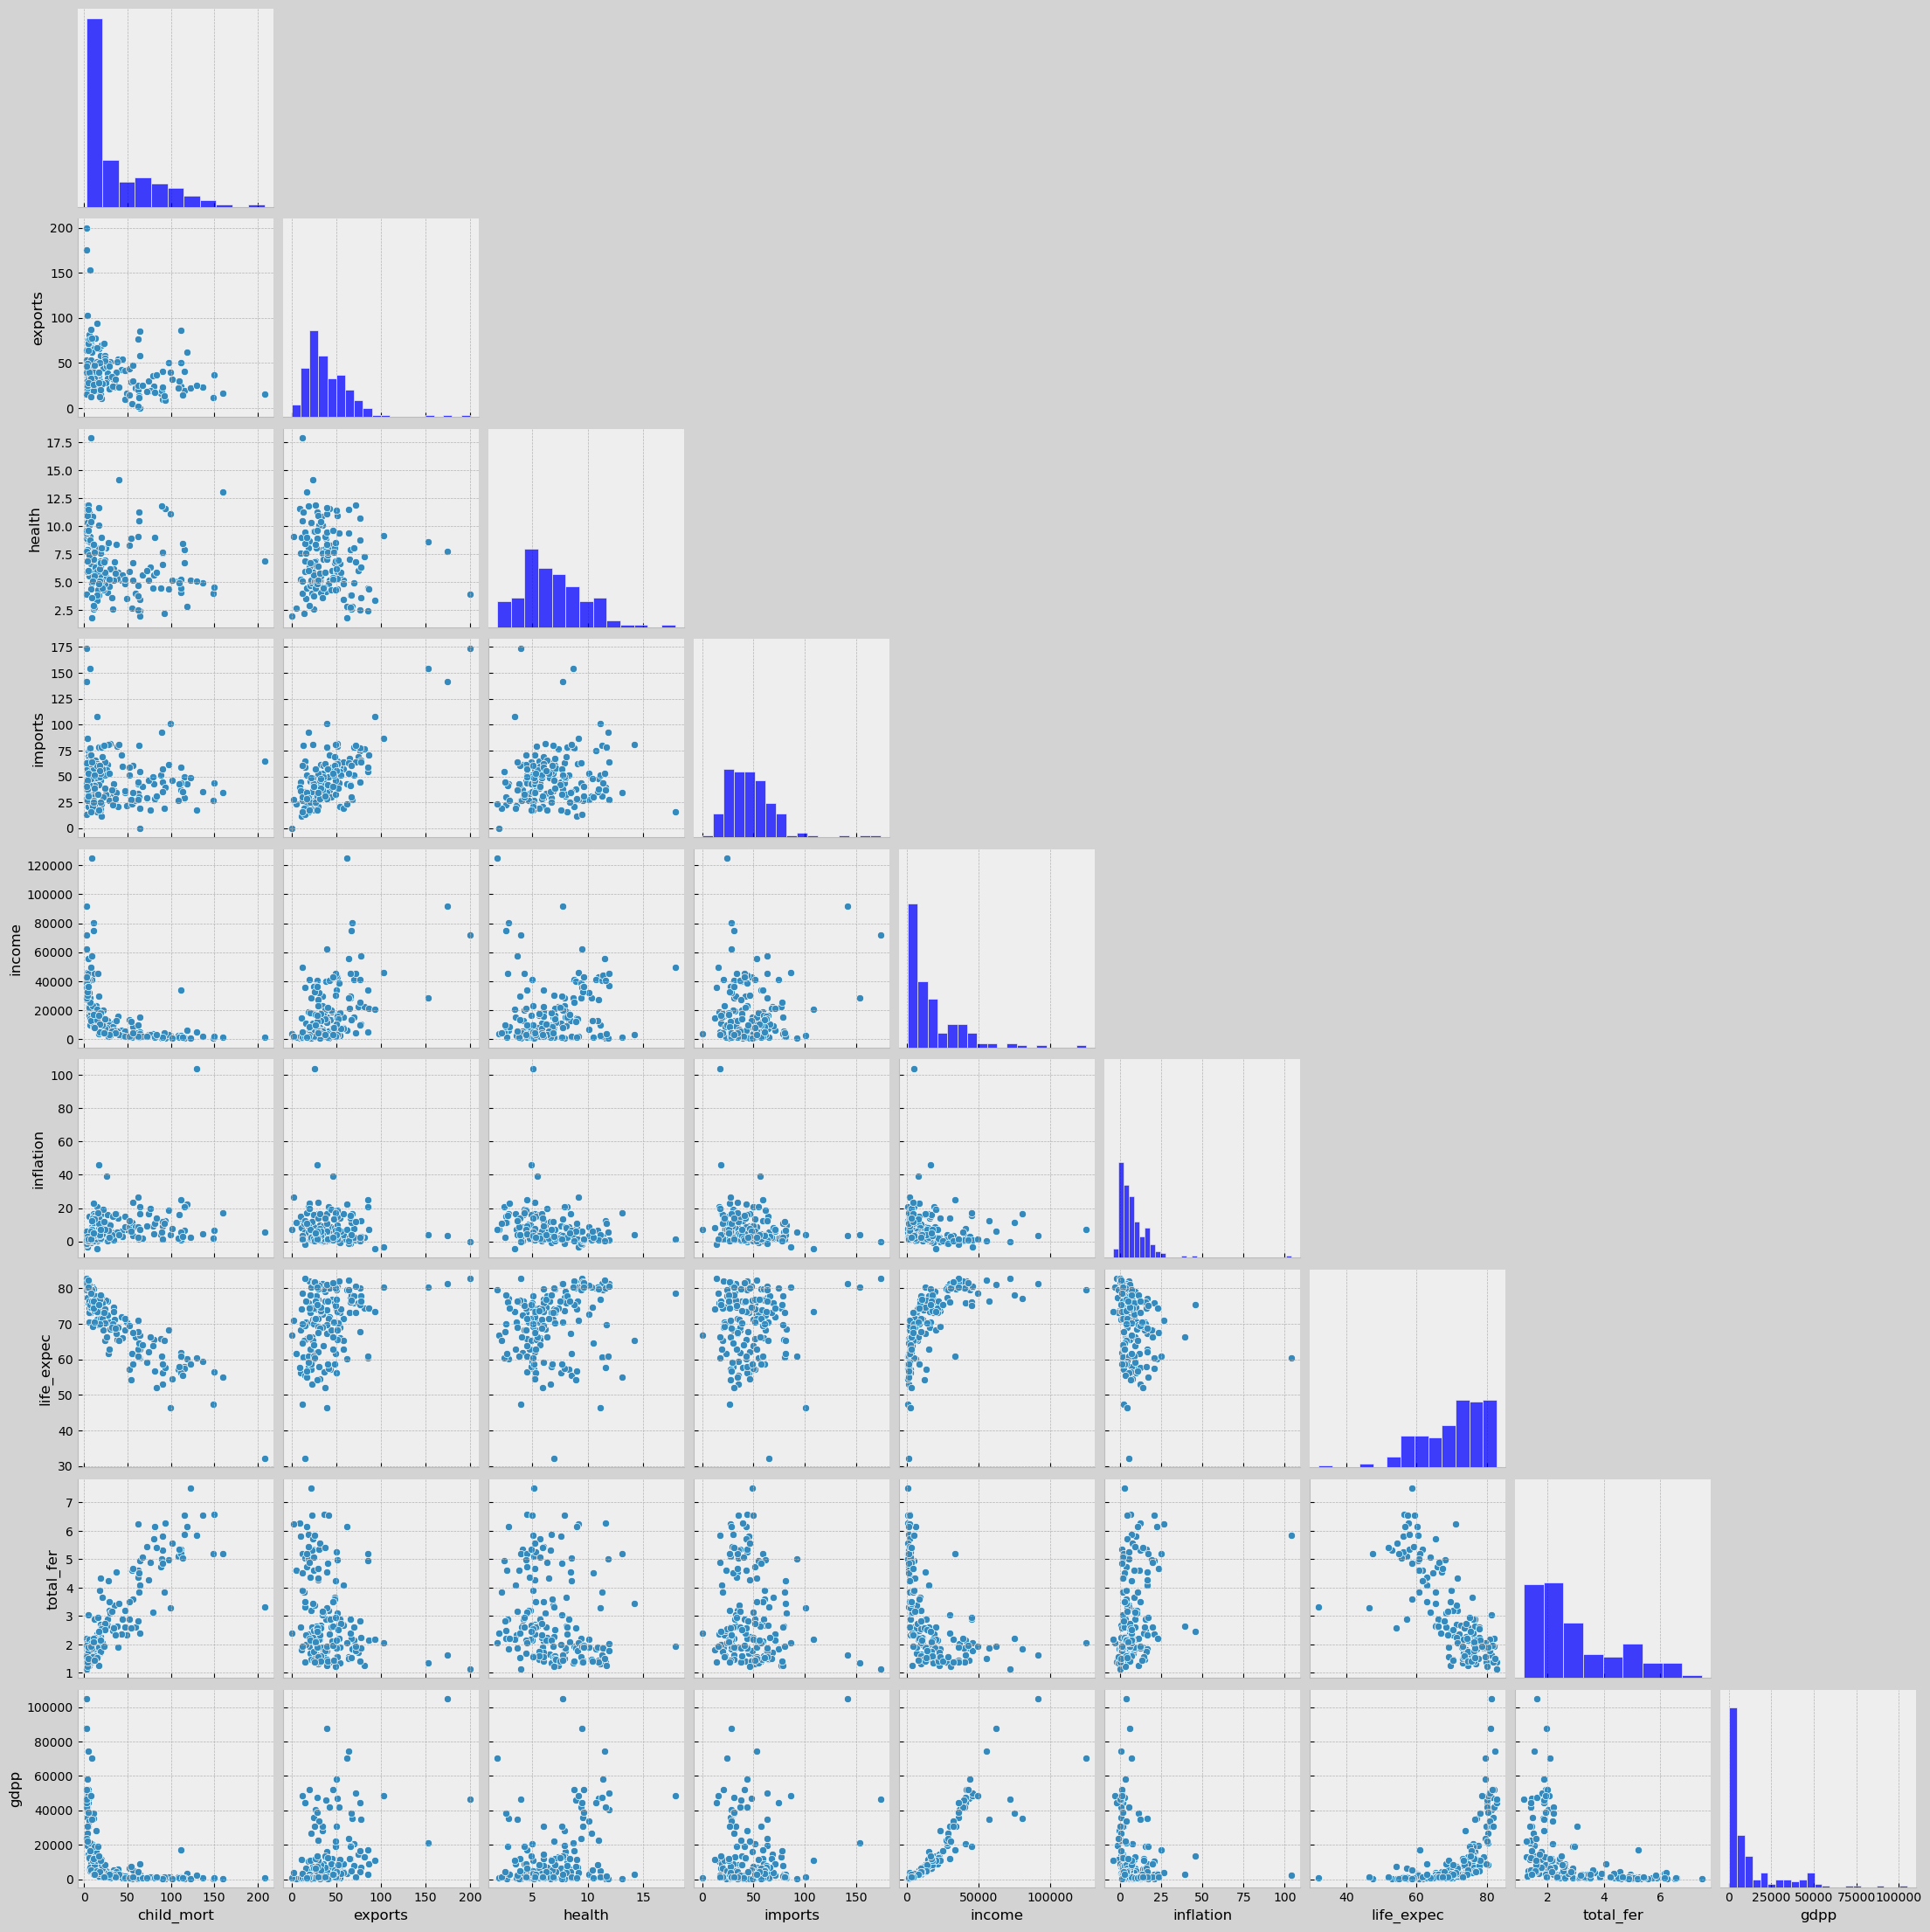

In [9]:
plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.style.use("bmh")
sns.pairplot(df.drop ("country", axis = 1), corner=True)

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
Here you can have a qiuck look for outliers and distributions of dataset features
</div>

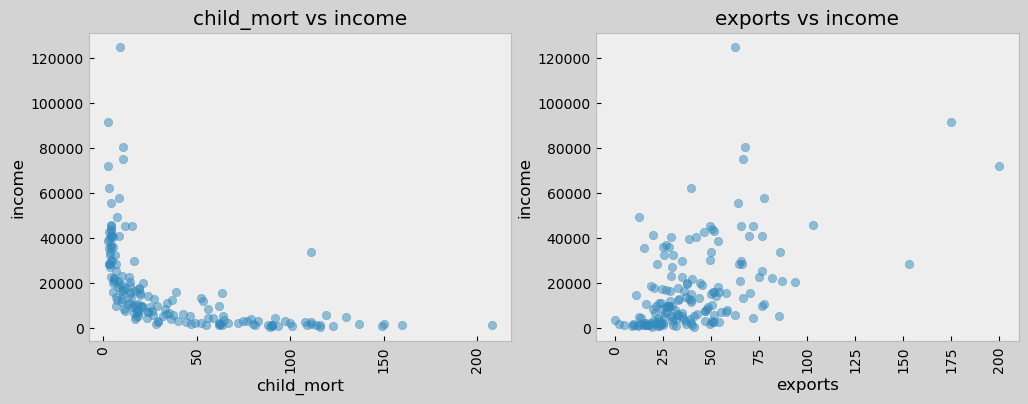

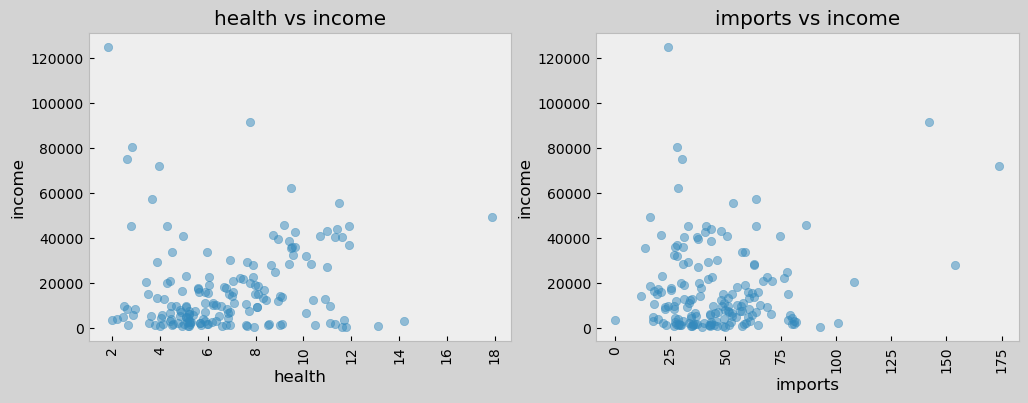

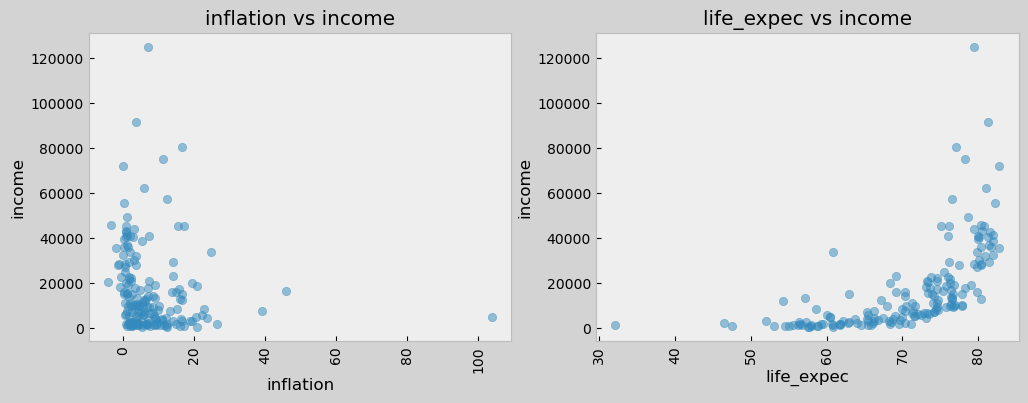

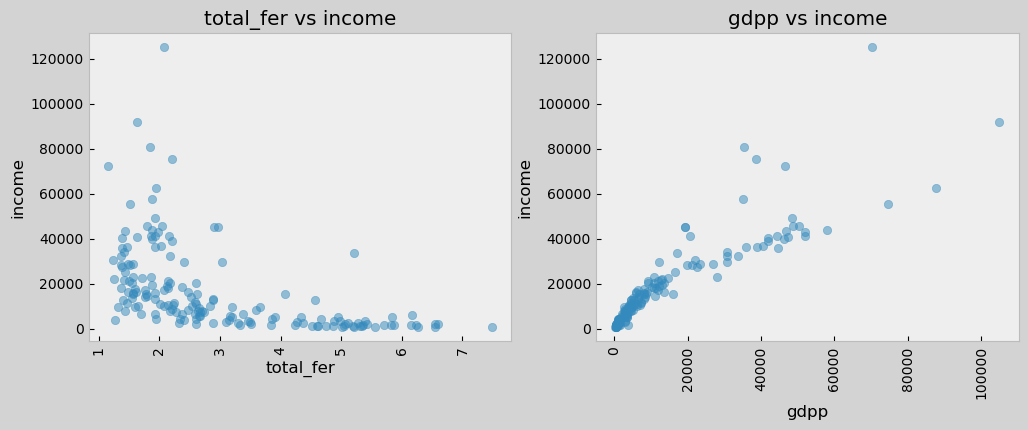

In [10]:
scatter_plot = list (df.drop (['country' , 'income'] , axis = 1))               
i =  0
while i < 8:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    plt.scatter (df [scatter_plot [i]] , df ["income"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs income")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("income")
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    plt.scatter (df [scatter_plot [i]] , df ["income"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs income")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("income")
    plt.grid ()
    i += 1
    plt.show ()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
Here you can check suspicious samples with more accuracy<br>
    
But as i said at first they are completely ok and they aren't noises so i don't remove them
</div>

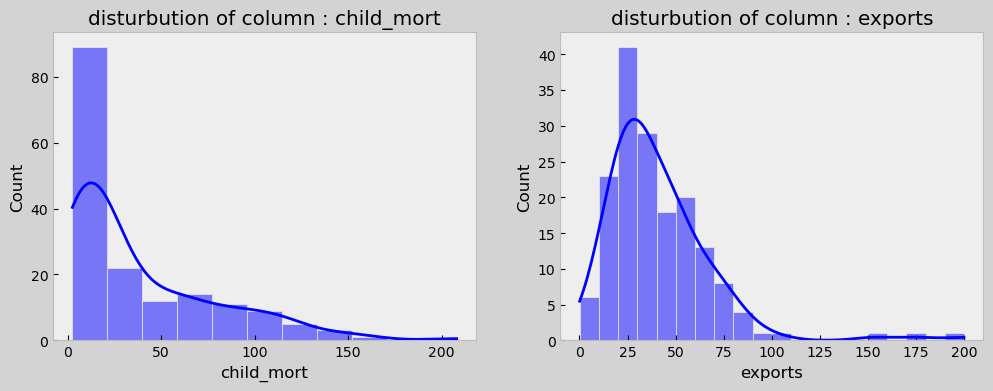

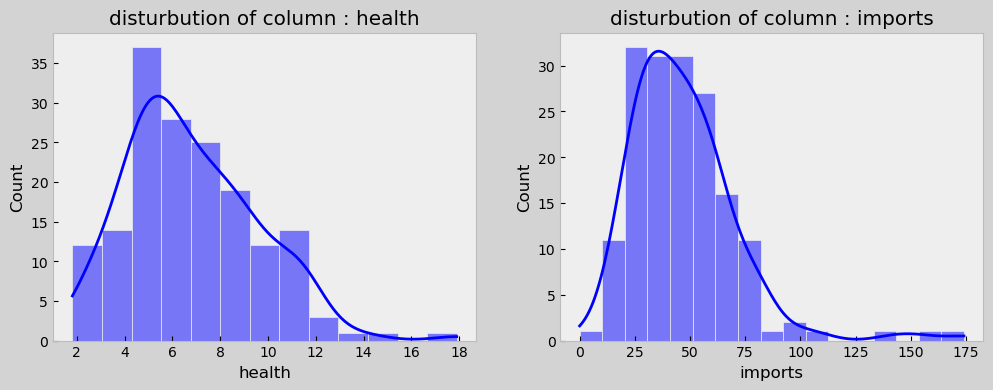

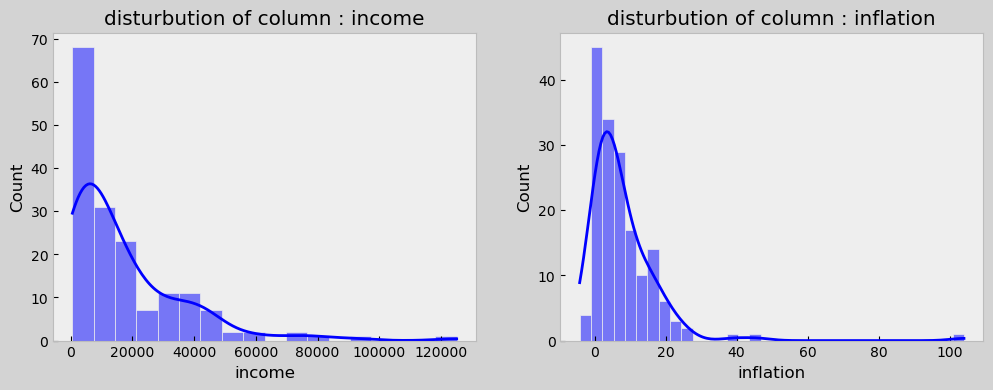

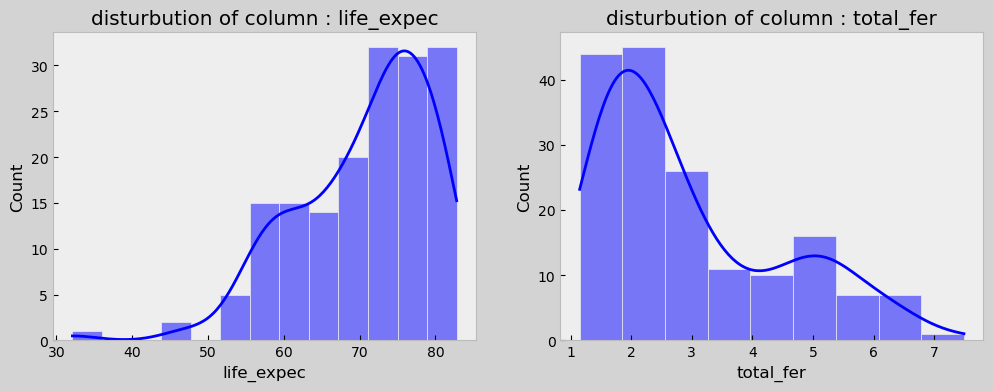

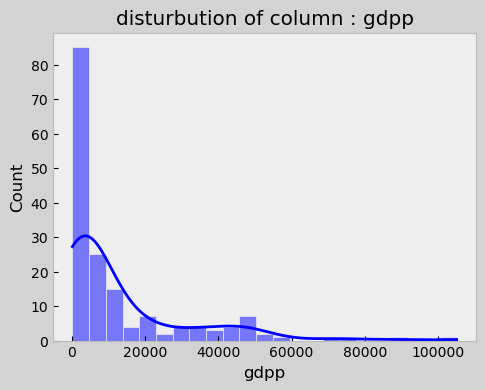

In [11]:
hist_plot = list (df.drop ("country" , axis = 1))               
i =  0
while i < 9:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    sns.histplot(df [hist_plot [i]] , kde=True)
    plt.title ('disturbution of column : ' + hist_plot [i])
    plt.grid ()
    i += 1
    
    if i < 9 :
        plt.subplot (1 , 2 , 2)
        sns.histplot(df [hist_plot [i]] , kde=True)
        plt.title ('disturbution of column : ' + hist_plot [i])
        plt.grid ()
        i += 1
        plt.show ()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
In these plots as you can see there are some disturbutions with 2 peaks in some features
</div>

<AxesSubplot:>

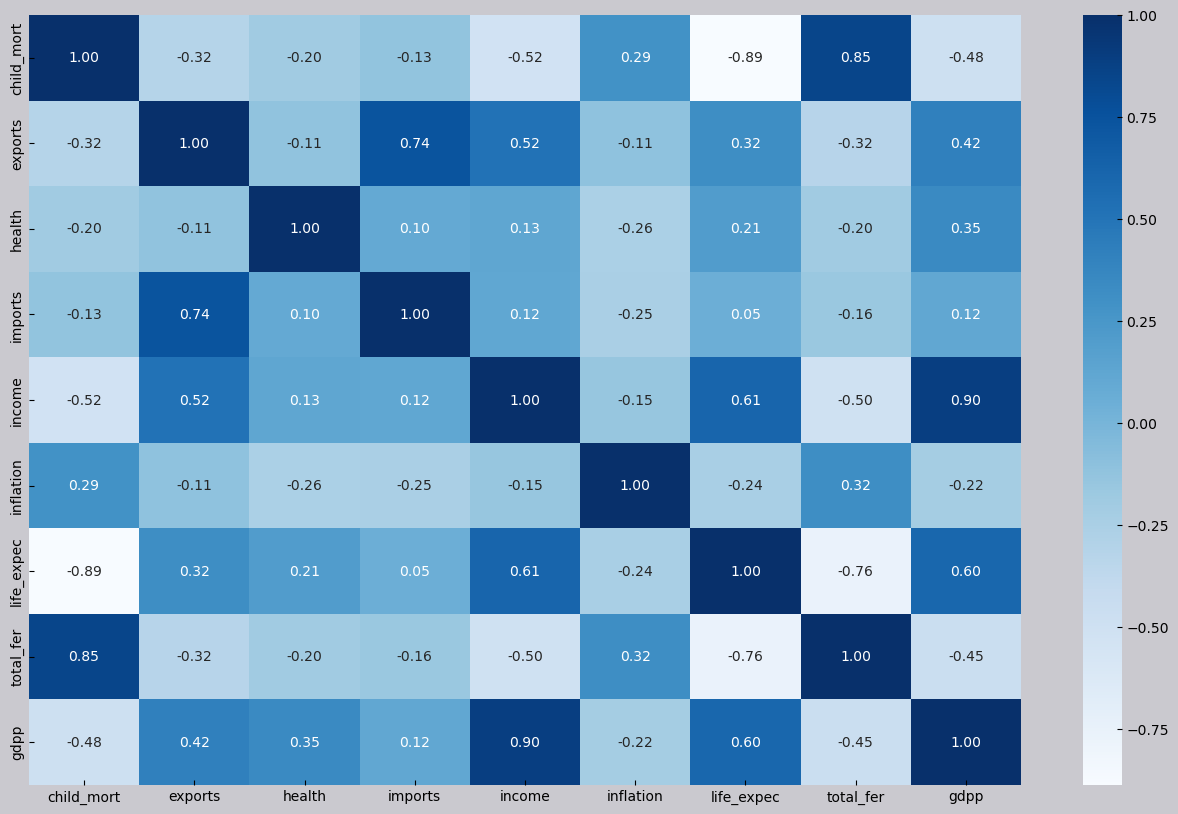

In [12]:
fig = plt.figure(figsize = (16, 10), facecolor='#cac9cf')
sns.heatmap(df.corr() , annot=True , fmt=".2f" , cmap = 'Blues')

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
In columns correlation to each other you can see that high correlation are related to :<br>
    
positive correlations :
- income and gdpp
- total_fer and child_mort
- exports and imports
<br> <br>
    
negative correlations :
- child_mort and life_expec
- life_expec and total_fer 
- income and total_fer
</div>

In [13]:
len (set (df.country))

167

In [14]:
df.shape

(167, 10)

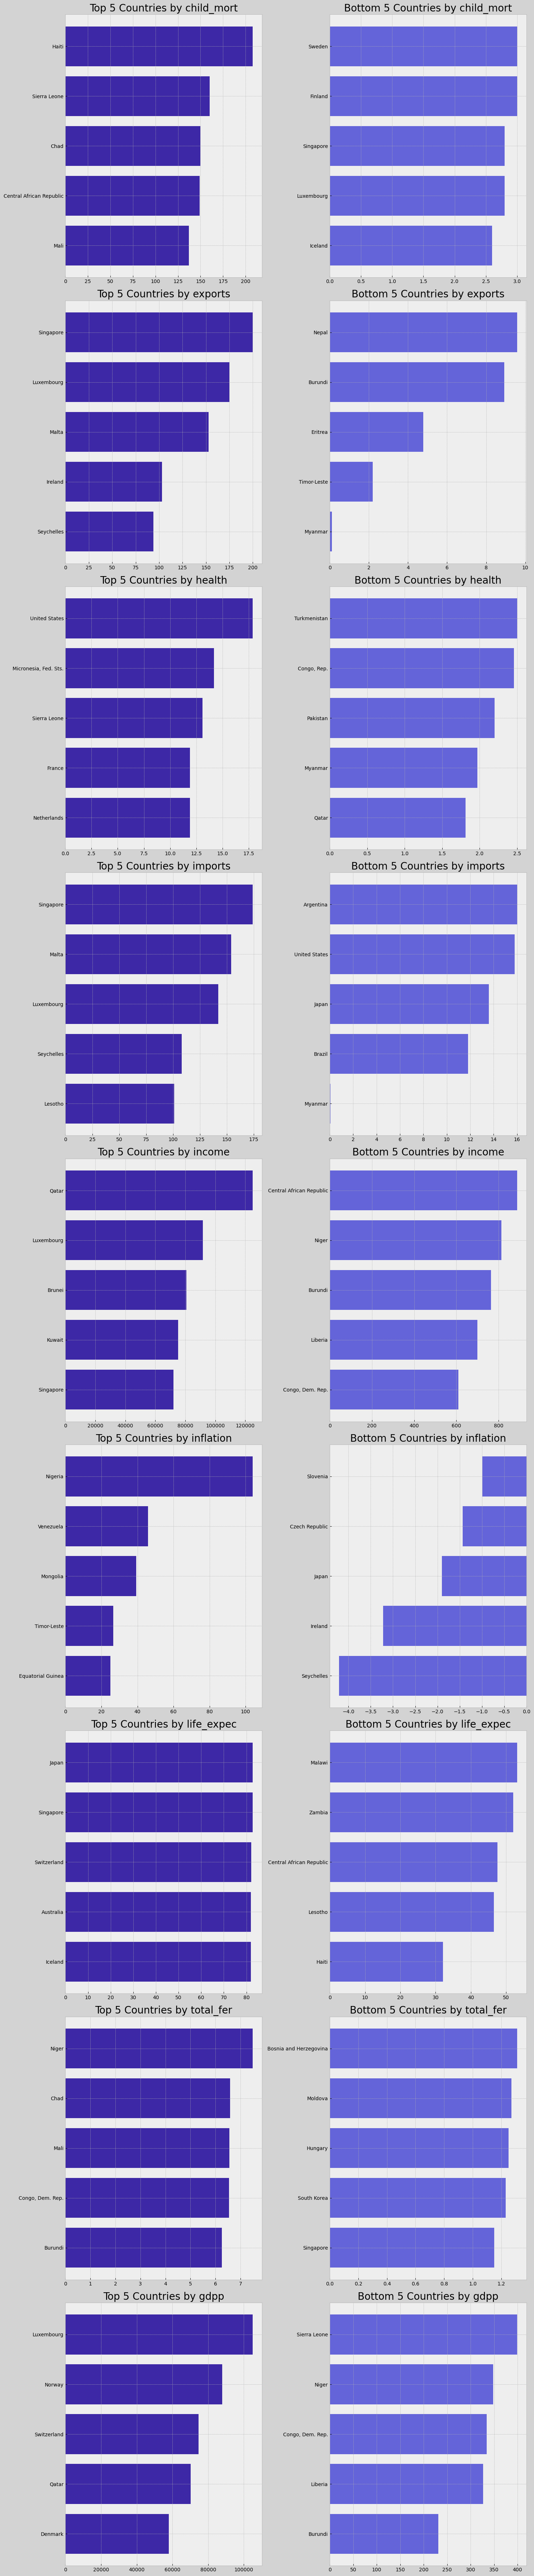

In [15]:
num_cols = df.select_dtypes(include='number').columns 

fig, axs = plt.subplots(len(num_cols), 2, figsize=(15, 8 * len(num_cols)))

for i, col in enumerate(num_cols):

    sorted_df = df.sort_values(col)
    

    top_df = sorted_df.tail(5)
    axs[i, 0].barh(top_df['country'], top_df[col], color='#3d28a6')
    axs[i, 0].set_title(f'Top 5 Countries by {col}', fontsize=20)
    

    bottom_df = sorted_df.head(5)
    axs[i, 1].barh(bottom_df['country'], bottom_df[col], color='#6464d9')
    axs[i, 1].set_title(f'Bottom 5 Countries by {col}', fontsize=20)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
Here are some bar plots which show lowest and highest values in columns<br>
    
With these bar plots and countries repetition in some features you can understand which countries have bad situation or on the other side have good situation.<br>
    
For example by repetition of switzerland in in top 5 countries based on gdpp and life expect you can understand that it is a good country<br>
    
Of course every one know it is a good country but there are some countries that are not very famous and everyone doesn't know their name so with these plots you can check countries situation.
</div>

In [16]:
df_map = list (df.drop ("country", axis = 1))   
for c in df_map:
    
    fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color= c ,
                    title='Coutries by ' + c ,
                    color_continuous_scale = 'Blues'
                   )
    
    fig.update_layout(
        paper_bgcolor='lightgrey'
    )
    
    fig.show()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
By these map plots you can easily check the countries situation based on features and the point of this plots is you can understand the general continents situation.<br>
    
For example in almost all columns you can see bad values for Africa - good scores for North America and Europe - and usual values for Asia<br>
</div>

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden;  font-weight: 500;">Models</div>

In [17]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [18]:
# dropping  country column because its contries name and it shouldnt be in our models
df.drop (['country'] , axis = 1 , inplace = True)  

In [19]:
scaler = StandardScaler ()              # scalling the features
scaled_features = scaler.fit_transform (df)

In [20]:
df_scaled = pd.DataFrame (scaled_features)    ##  making scaled values to data frame 
df_scaled.columns = df.columns                ## puting their column names 
df_scaled

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

<div style = 'border : 3px solid non;text-align: center; background-color:#cac9cf; padding:10px; color:#7d5eb5'>defining some fuctions for visualization
</div>

In [21]:
def plot2 (data24) :
    plt.style.use("default")
    custom_colors = ["#583beb", "#3d28a6" , '#1e1357' , '#070414' , '#000000']
    fig, ax = plt.subplots(1, 2, figsize=(12,6),facecolor='gray') 
    ax[0].set_facecolor('#6a757d') 

    sns.countplot(x='cluster', data=data24 , ax=ax[0], palette=custom_colors) 
    for p in ax[0].patches:
        ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points')
    ax[0].grid(True)
    ax[0].set_title('Count Plot of Clusters')

    cluster_counts = data24 ['cluster'].value_counts()
    ax[1].pie(cluster_counts, labels = cluster_counts.index, autopct='%1.1f%%', startangle=90, 
         colors=custom_colors)
    ax[1].set_title('Percentage of Clusters')

    plt.tight_layout() 
    plt.show()

In [22]:
def plot3 (data24):
    columns_to_plot = list (data24.columns)
    plt.rcParams['figure.facecolor'] = 'lightgrey'
    plt.style.use("bmh")
    sns.pairplot(data24 [columns_to_plot],  hue='cluster', corner=True)

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Dimensionality reduction (PCA)</div>

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
    
- Explained variance represents the information explained using different principal components (eigenvectors)
- Explained variance is calculated as ratio of eigenvalue of a articular principal component (eigenvector) with total eigenvalues.
- Explained variance can be calculated as the attribute explained_variance_ratio_ of PCA instance created using sklearn.decomposition PCA class.

</div>

In [23]:
PCA = PCA()
df_PCA = pd.DataFrame(PCA.fit_transform(df_scaled))
PCA.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [24]:
EVR = PCA.explained_variance_ratio_
PCs = []
for i in range (1 , 10):
    PCs.append(f'PC{i}')
    
df_EVR = pd.DataFrame({
    'PCs': PCs ,
    'explained_variance_ratio': EVR
})
df_EVR['Cumulative_Variance'] = df_EVR['explained_variance_ratio'].cumsum()
df_EVR

PCs  explained_variance_ratio  Cumulative_Variance
0  PC1                  0.459517             0.459517
1  PC2                  0.171816             0.631334
2  PC3                  0.130043             0.761376
3  PC4                  0.110532             0.871908
4  PC5                  0.073402             0.945310
5  PC6                  0.024842             0.970152
6  PC7                  0.012604             0.982757
7  PC8                  0.009813             0.992569
8  PC9                  0.007431             1.000000

In [25]:
PCA.n_components_

9

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
As you can see we have 9 components or 9 pcs which always is as same as column or feature numbers<br>
    
Top two pcs which have best variances are : pc1 = 46% and pc2 = 17%
</div>

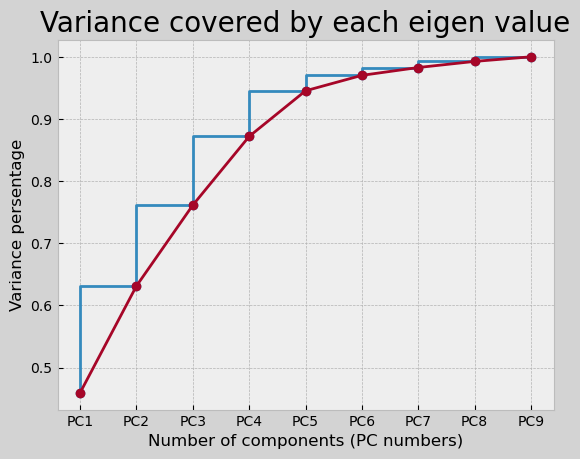

In [26]:
plt.step (df_EVR.PCs , df_EVR.Cumulative_Variance , marker = 'o')
plt.plot(df_EVR.PCs , df_EVR.Cumulative_Variance , marker = 'o')

plt.title('Variance covered by each eigen value', fontsize = 20)
plt.xlabel('Number of components (PC numbers)')
plt.ylabel('Variance persentage') 
plt.show()

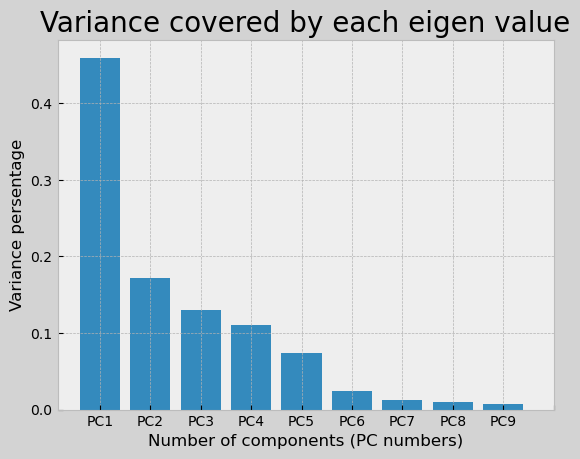

In [27]:
bars = plt.bar(df_EVR.PCs , df_EVR.explained_variance_ratio)
plt.title('Variance covered by each eigen value', fontsize = 20)
plt.xlabel('Number of components (PC numbers)')
plt.xticks (range (0 , 10))
plt.ylabel('Variance persentage') 
plt.show()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
Around 95 % of variance is the usual and good percentage for eigen value<br>
    
Also the elbow of explained_variance_ratio plot shows us 5 for the number of components<br>

So i choose PC5
</div>

In [28]:
# making a df by pca 5
from sklearn.decomposition import PCA
pca = PCA (n_components = 5)
pca_df = pd.DataFrame (pca.fit_transform(df_scaled) , columns = ['PC1' , 'PC2' , 'PC3' , 'PC4' , 'PC5'])

In [29]:
pca_df  

PC1       PC2       PC3       PC4       PC5
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475
3   -2.932423  1.695555  1.525044  0.839625 -0.273209
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007
..        ...       ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581
164  0.498524  1.390744 -0.238526 -1.074098  1.176081
165 -1.887451 -0.109453  1.109752  0.056257  0.618365
166 -2.864064  0.485998  0.223167  0.816364 -0.274068

[167 rows x 5 columns]

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">KMeans</div>

In [30]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []
for k in range(2,11):
    kmeans = KMeans (n_clusters = k , random_state = 42)
    kmeans.fit (pca_df)
    
    score = silhouette_score (pca_df , kmeans.predict(pca_df))
    silhouette.append (score)
    
    score1 = calinski_harabasz_score (pca_df, kmeans.predict(pca_df))
    calinski_harabasz.append(score1)
    
    score2 = davies_bouldin_score (pca_df, kmeans.predict(pca_df))
    davies_bouldin.append (score2)
    
    score3 = kmeans.inertia_
    inertia.append (score3)

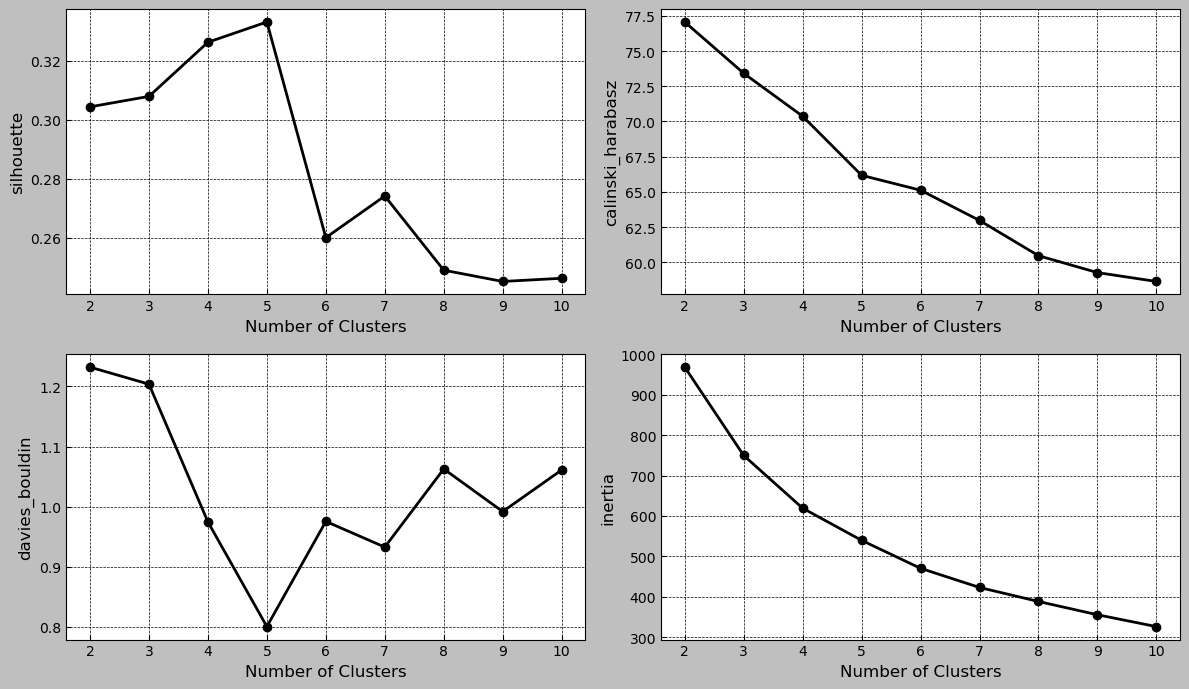

In [31]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin , 'inertia': inertia}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j] 
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
By these plots and better score for 4 clusters i decided to put this number for n_clusters
</div>


In [32]:
kmeansV = pca_df.copy ()
kmeans = KMeans (n_clusters = 4 , random_state = 42)
kmeans.fit (pca_df)
kmeansV ['cluster'] = kmeans.predict (pca_df)
kmeansV

PC1       PC2       PC3       PC4       PC5  cluster
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310        1
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677        0
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475        0
3   -2.932423  1.695555  1.525044  0.839625 -0.273209        1
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007        0
..        ...       ...       ...       ...       ...      ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748        0
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581        0
164  0.498524  1.390744 -0.238526 -1.074098  1.176081        0
165 -1.887451 -0.109453  1.109752  0.056257  0.618365        1
166 -2.864064  0.485998  0.223167  0.816364 -0.274068        1

[167 rows x 6 columns]

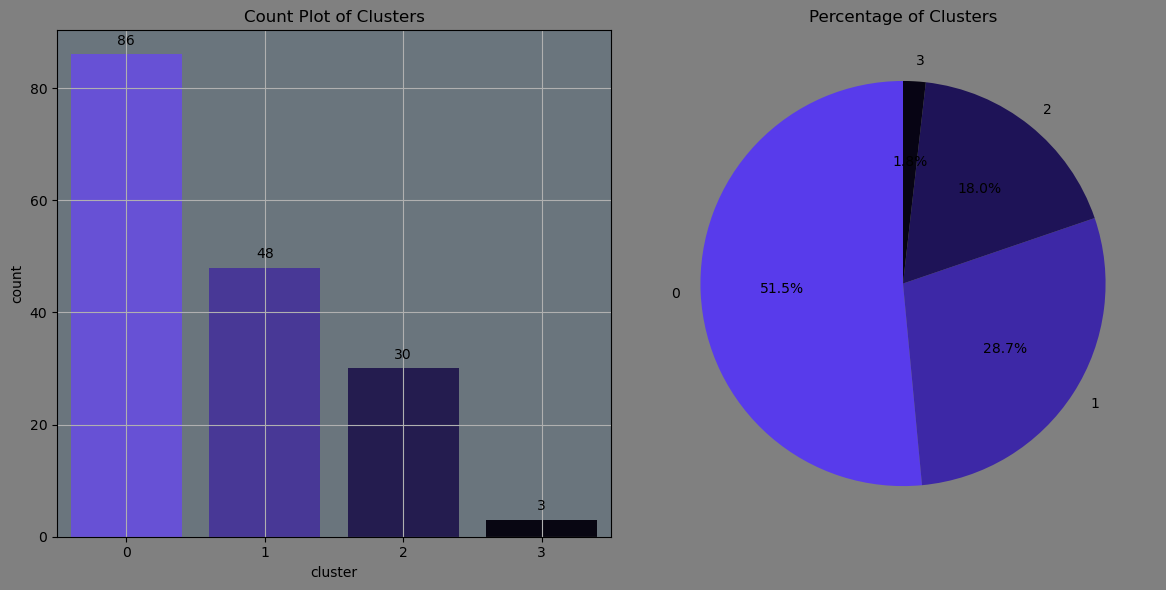

In [33]:
plot2 (kmeansV)

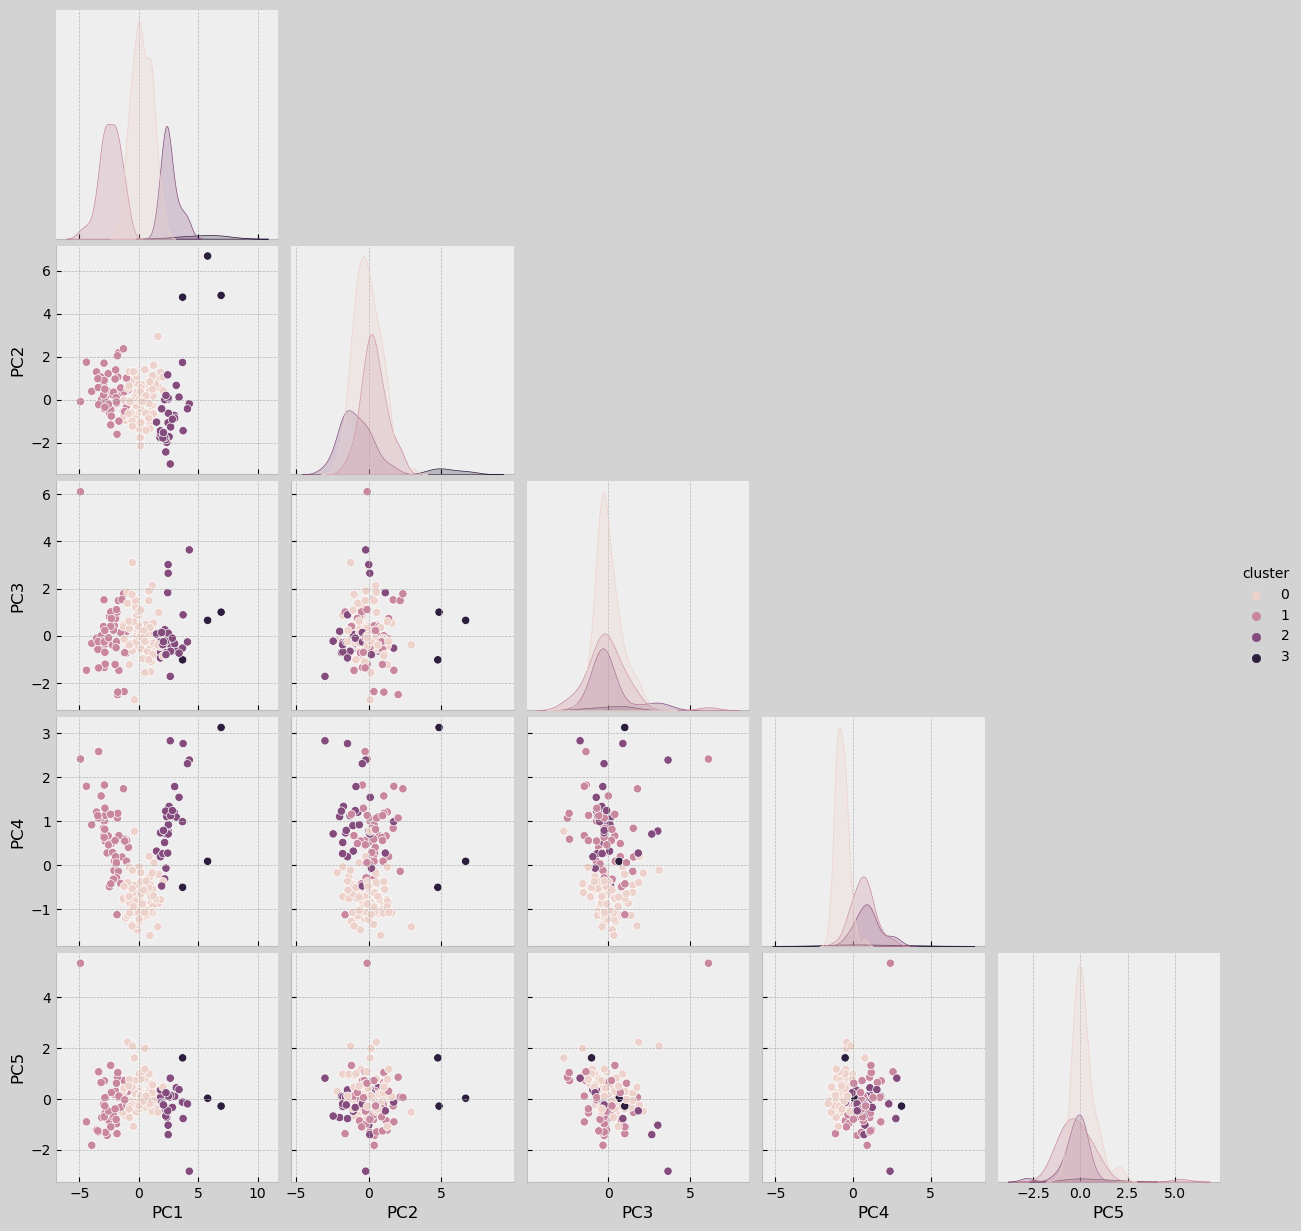

In [34]:
plot3 (kmeansV)

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden;  font-weight: 500;">MiniBatchKMeans</div>

In [35]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []
for k in range(2,11):
    MB = MiniBatchKMeans (n_clusters = k , random_state = 42)
    MB.fit (pca_df)
    
    score = silhouette_score (pca_df , MB.predict(pca_df))
    silhouette.append (score)
    
    score1 = calinski_harabasz_score (pca_df, MB.predict(pca_df))
    calinski_harabasz.append(score1)
    
    score2 = davies_bouldin_score (pca_df, MB.predict(pca_df))
    davies_bouldin.append (score2)
    
    score3 = MB.inertia_
    inertia.append (score3)

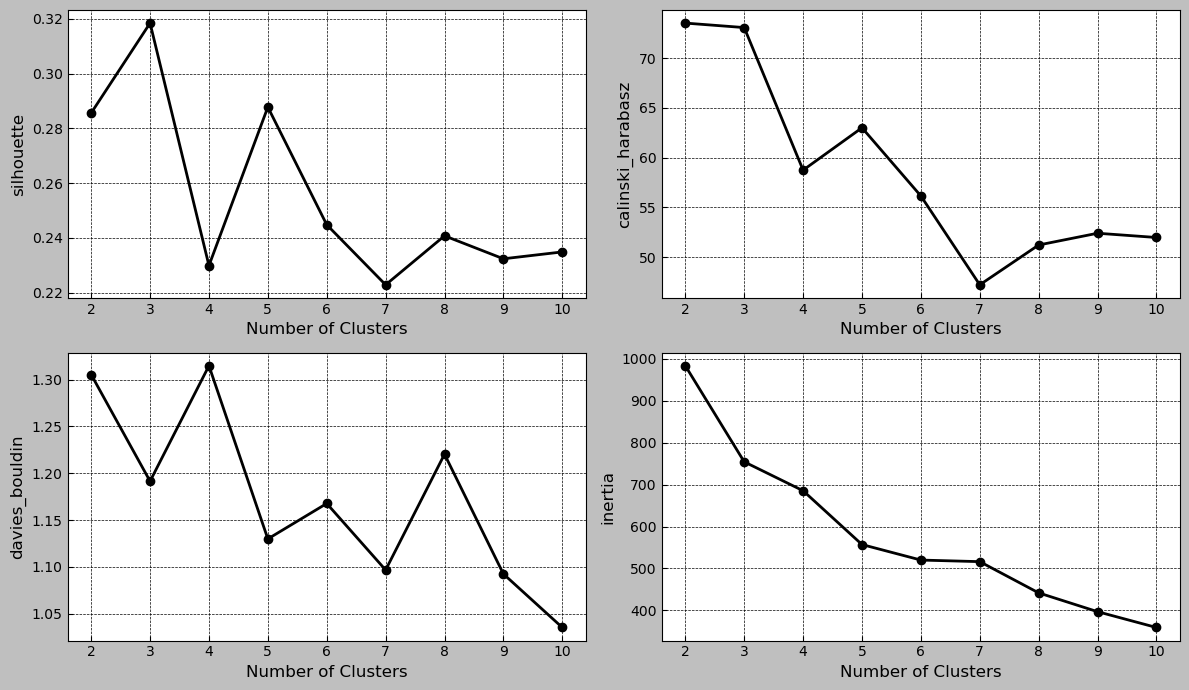

In [36]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin , 'inertia': inertia}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j] 
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
As you can see 3 has awesome scores
</div>


In [37]:
MBV = pca_df.copy ()
MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42)
MB.fit (pca_df)
MBV ['cluster'] = MB.predict (pca_df)

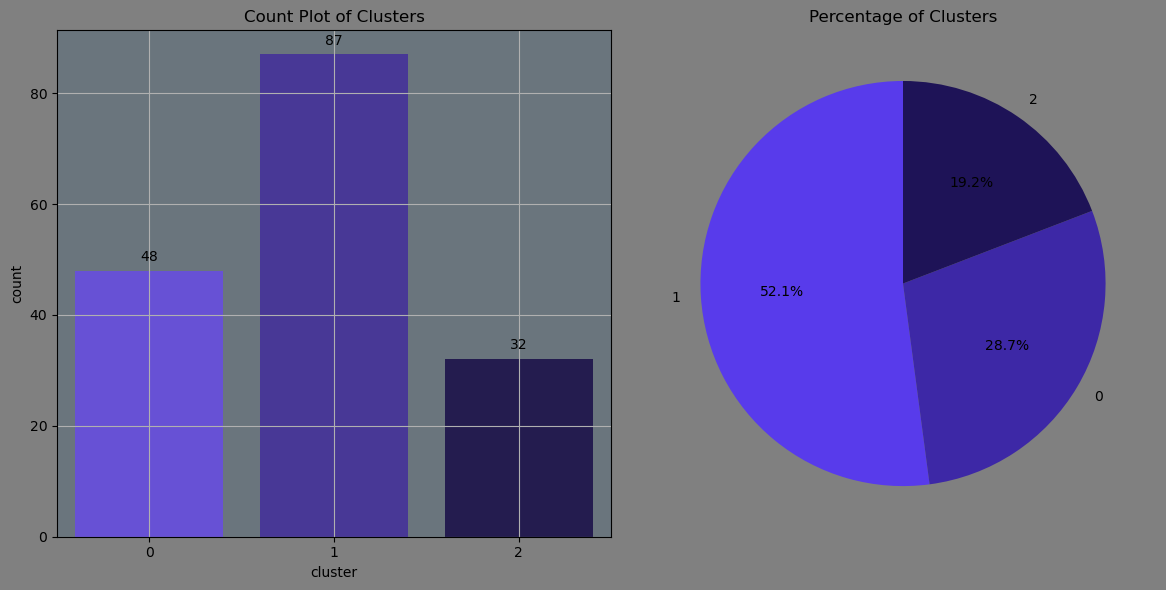

In [38]:
plot2 (MBV)

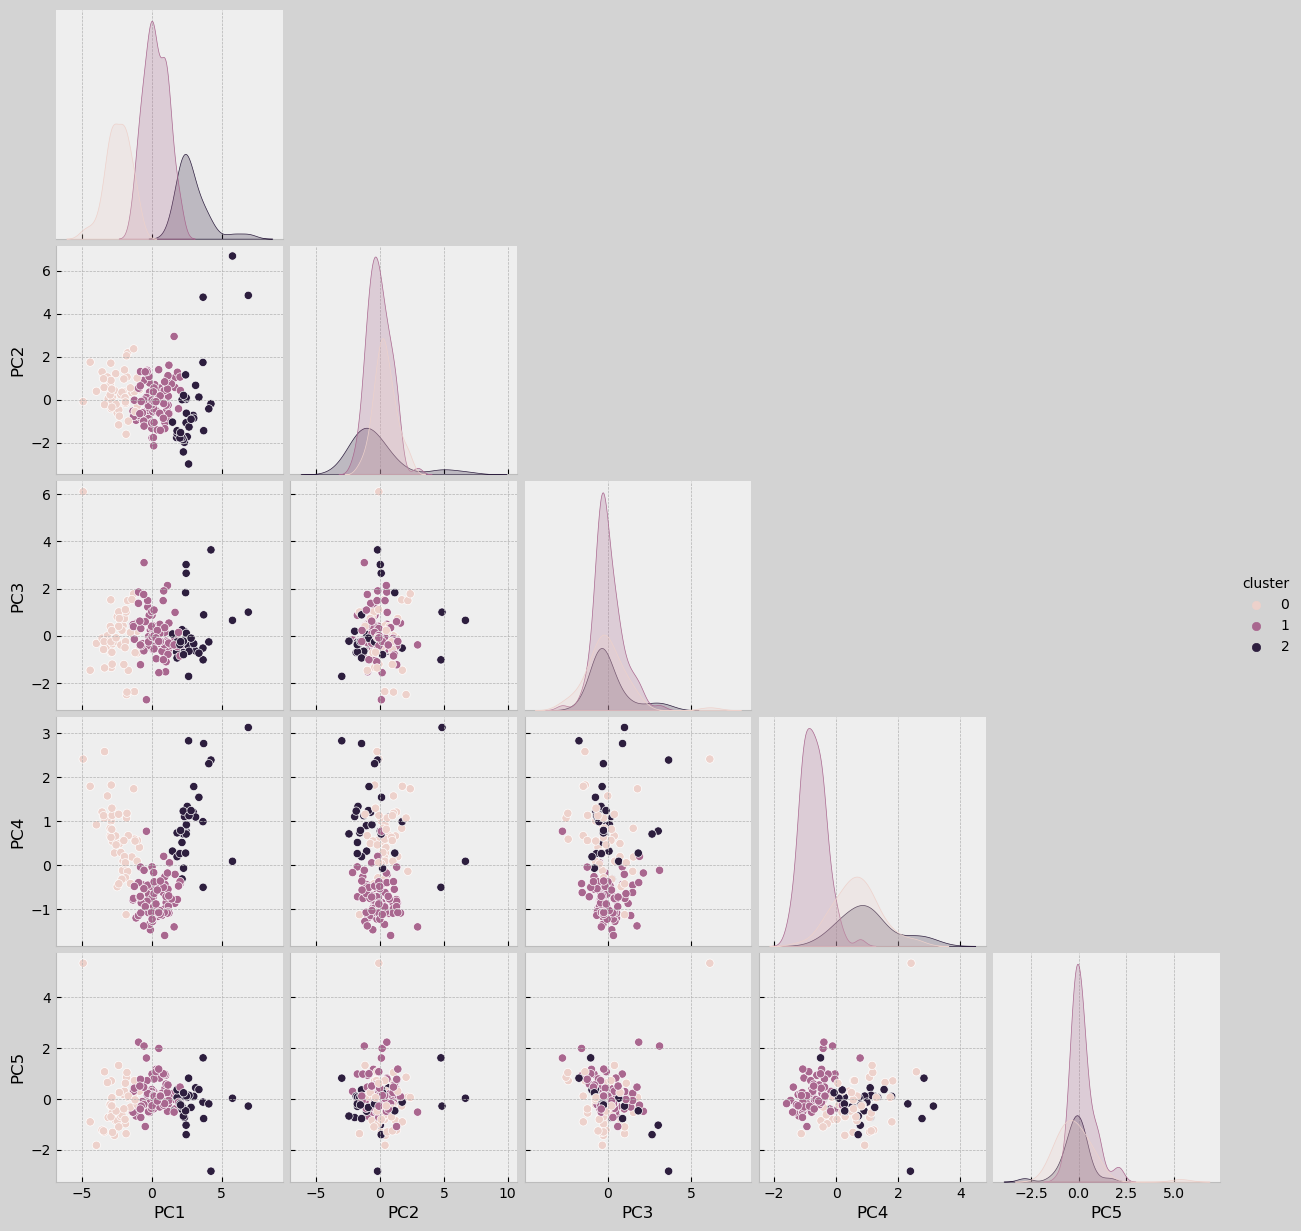

In [39]:
plot3 (MBV)

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">BIRCH</div>

In [40]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2,11):
    BR = Birch (n_clusters = k)
    BR.fit (pca_df)
    
    score = silhouette_score (pca_df , BR.predict(pca_df))
    silhouette.append (score)
    
    score1 = calinski_harabasz_score (pca_df, BR.predict(pca_df))
    calinski_harabasz.append(score1)
    
    score2 = davies_bouldin_score (pca_df, BR.predict(pca_df))
    davies_bouldin.append (score2)

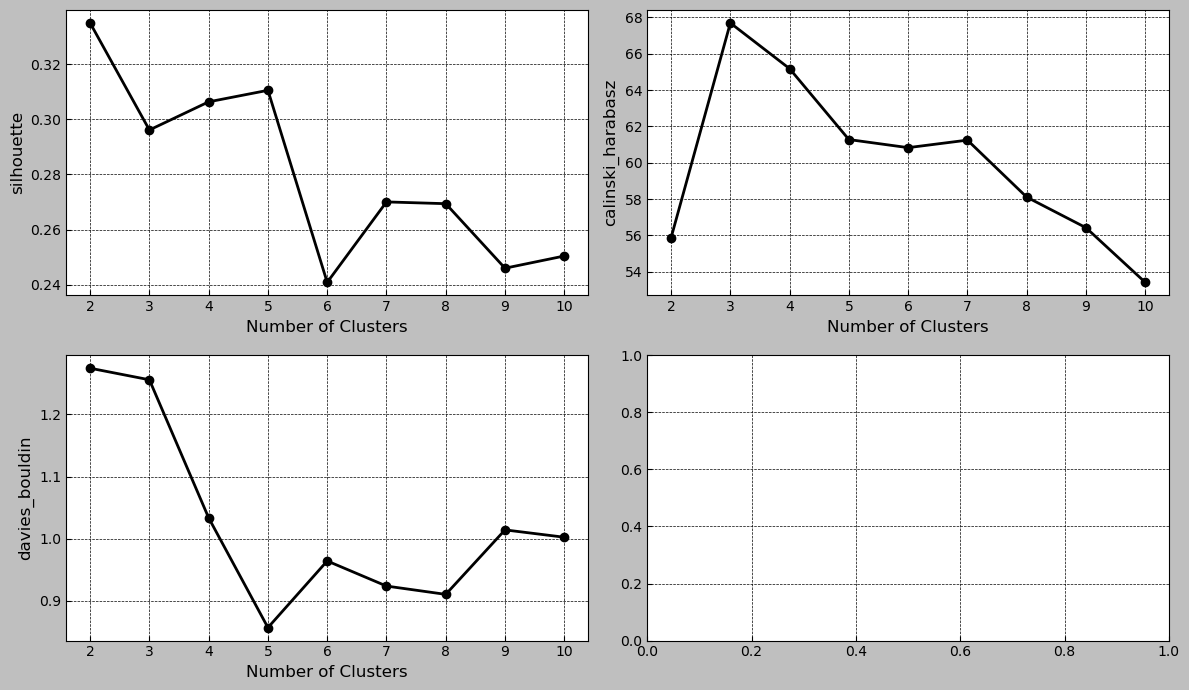

In [41]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j] 
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
You can put the number 3 for clusters, it has good scores
</div>


In [42]:
# checking different threshold values
silhouette = []
calinski_harabasz = []
davies_bouldin = []
threshold_values = range(1, 10, 1)
for i in threshold_values:
    i = i / 10
    BR = Birch (n_clusters = 3 , threshold = i)
    BR.fit (pca_df)
    score = silhouette_score(pca_df, BR.predict(pca_df))
    silhouette.append(score)
    score1 = calinski_harabasz_score (pca_df, BR.fit_predict(pca_df))
    calinski_harabasz.append(score1)
    score2 = davies_bouldin_score (pca_df, BR.fit_predict(pca_df))
    davies_bouldin.append (score2)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_calinski_harabasz = pd.DataFrame(calinski_harabasz, columns=['calinski_harabasz'])
df_davies_bouldin = pd.DataFrame(davies_bouldin , columns=['davies_bouldin'])
df_threshold = pd.DataFrame(threshold_values, columns=['threshold'])
result = pd.concat([df_threshold, df_silhouette, df_calinski_harabasz , df_davies_bouldin], axis=1)
result

threshold  silhouette_score  calinski_harabasz  davies_bouldin
0          1          0.304272          69.531418        1.252865
1          2          0.304272          69.531418        1.252865
2          3          0.263638          55.378264        1.263649
3          4          0.321613          60.262174        1.008223
4          5          0.296125          67.695533        1.255557
5          6          0.343141          58.690822        1.018033
6          7          0.236386          45.391795        1.124721
7          8          0.289066          55.862358        1.074334
8          9          0.348441          59.346446        0.948227

In [43]:
BRV = pca_df.copy ()
BR = Birch (n_clusters = 3)
BR.fit (pca_df)
BRV ['cluster'] = BR.fit_predict (pca_df)

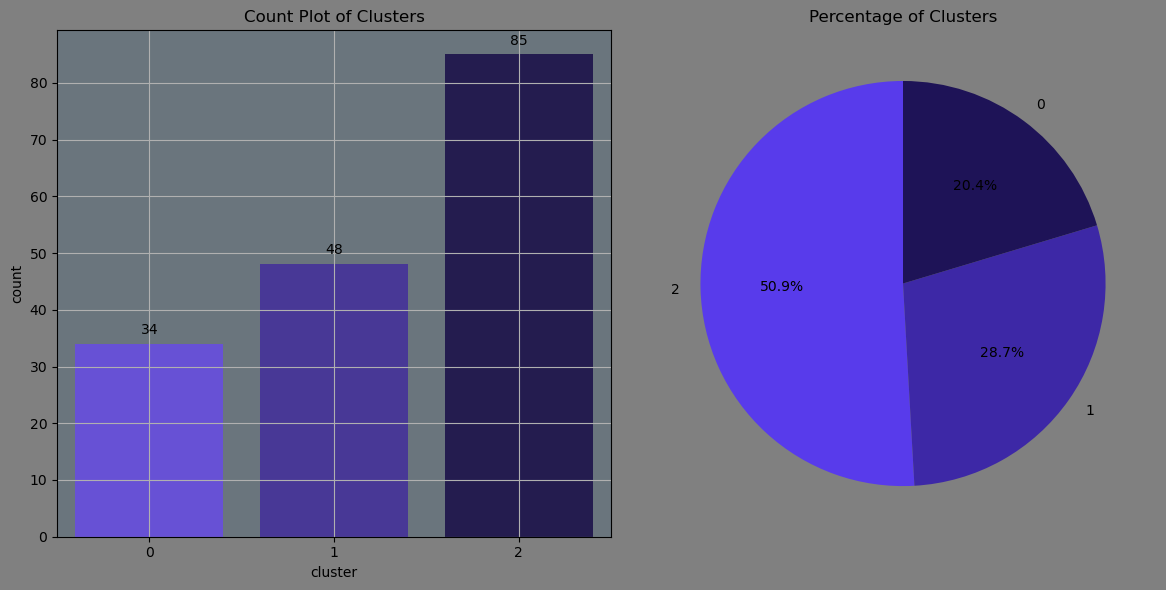

In [44]:
plot2 (BRV)

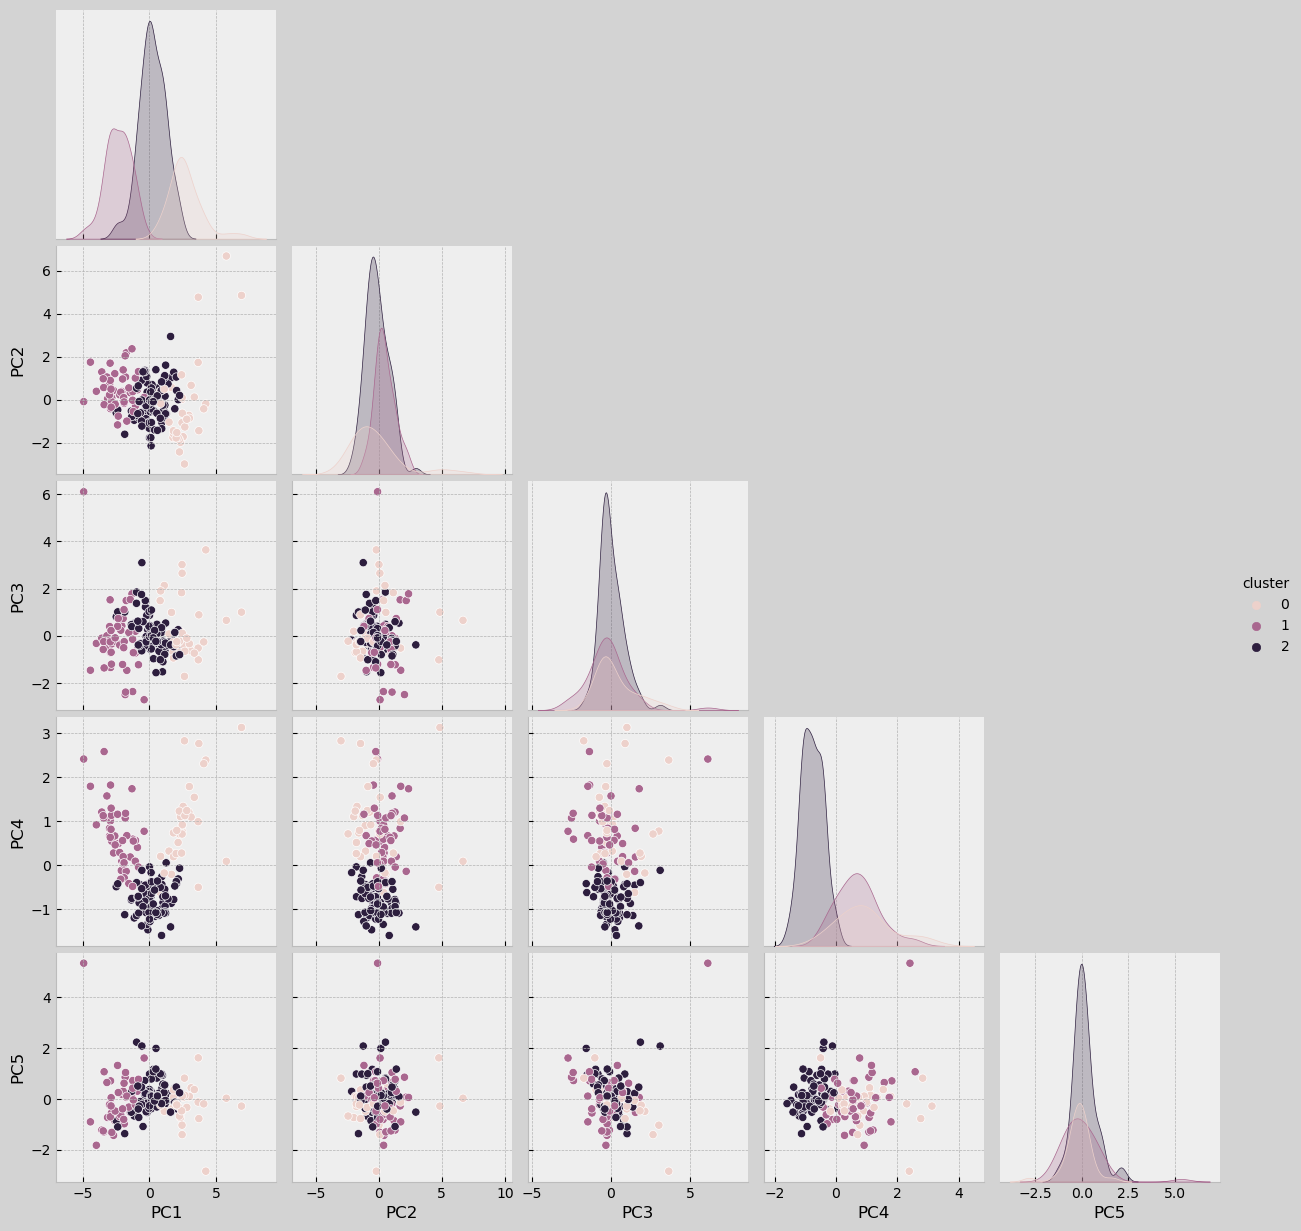

In [45]:
plot3 (BRV)

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">conclusion & final visualization</div>

In [46]:
last = [    
    {'model' : 'KMeans'  , 'N clusters' : 4 , 'silhouette' : 0.326 , 'calinski_harabasz' : 70.36 , 'davies_bouldin' : 0.974 } ,
    {'model' : 'MiniBatchKMeans'  , 'N clusters' : 3 , 'silhouette' : 0.318 , 'calinski_harabasz' : 73.09 , 'davies_bouldin' : 1.191 } ,
    {'model' : 'Birch'  , 'N clusters' : 3 , 'silhouette' : 0.296 , 'calinski_harabasz' : 67.69 , 'davies_bouldin' : 1.255 } 
]
    
last = pd.DataFrame (last)
last

model  N clusters  silhouette  calinski_harabasz  davies_bouldin
0           KMeans           4       0.326              70.36           0.974
1  MiniBatchKMeans           3       0.318              73.09           1.191
2            Birch           3       0.296              67.69           1.255

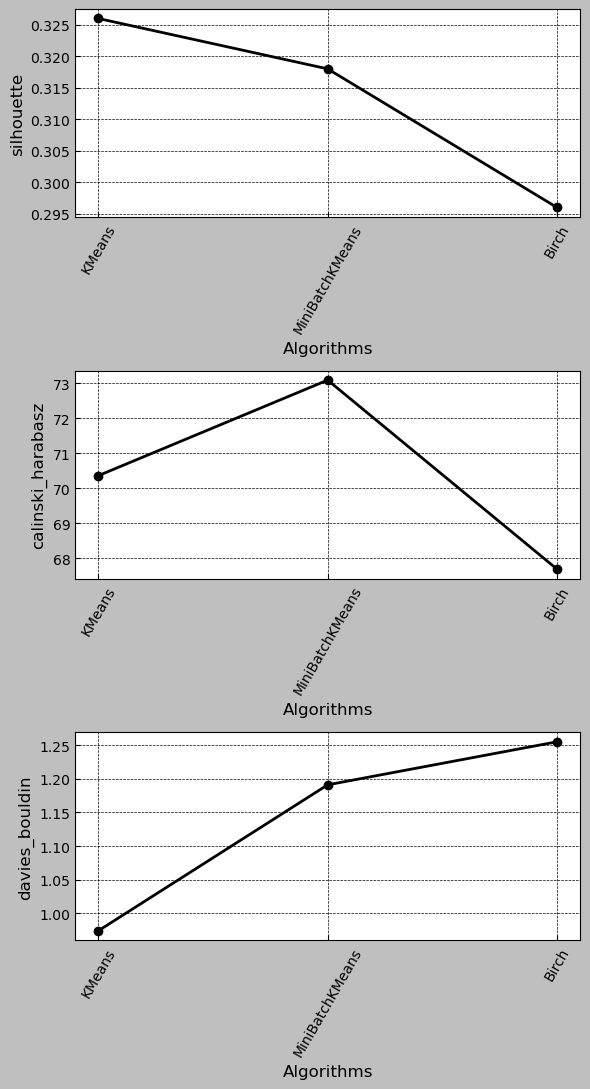

In [47]:
plt.style.use('grayscale')
plt.figure (figsize = (6 , 11))
metrics = ['silhouette' , 'calinski_harabasz' , 'davies_bouldin']

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    plt.plot(last.model, last[metric], marker = 'o')
    plt.xlabel('Algorithms')
    plt.xticks(rotation = 60)
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout() 
plt.show()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
By the scores and algorithms visualization in their part, i found that K-Means and MiniBatchKMeans algorithms clusters better this pca dataframe
</div>

In [48]:
df1 = pd.DataFrame (data)             # adding country names to the data set which clustered by mini batch
MBV ['country'] = df1['country'].copy()
MBV

PC1       PC2       PC3       PC4       PC5  cluster  \
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310        0   
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677        1   
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475        1   
3   -2.932423  1.695555  1.525044  0.839625 -0.273209        0   
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007        1   
..        ...       ...       ...       ...       ...      ...   
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748        1   
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581        1   
164  0.498524  1.390744 -0.238526 -1.074098  1.176081        1   
165 -1.887451 -0.109453  1.109752  0.056257  0.618365        0   
166 -2.864064  0.485998  0.223167  0.816364 -0.274068        0   

                 country  
0            Afghanistan  
1                Albania  
2                Algeria  
3                 Angola  
4    Antigua and Barbuda  
..                   ...  
162              Vanuatu  
163            Venezuela  
164              Vietnam  
165                Yemen  
166               Zambia  

[167 rows x 7 columns]

In [49]:
df1 = pd.DataFrame (data)            # adding country names to the data set which clustered by kmeans
kmeansV ['country'] = df1['country'].copy()
kmeansV

PC1       PC2       PC3       PC4       PC5  cluster  \
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310        1   
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677        0   
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475        0   
3   -2.932423  1.695555  1.525044  0.839625 -0.273209        1   
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007        0   
..        ...       ...       ...       ...       ...      ...   
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748        0   
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581        0   
164  0.498524  1.390744 -0.238526 -1.074098  1.176081        0   
165 -1.887451 -0.109453  1.109752  0.056257  0.618365        1   
166 -2.864064  0.485998  0.223167  0.816364 -0.274068        1   

                 country  
0            Afghanistan  
1                Albania  
2                Algeria  
3                 Angola  
4    Antigua and Barbuda  
..                   ...  
162              Vanuatu  
163            Venezuela  
164              Vietnam  
165                Yemen  
166               Zambia  

[167 rows x 7 columns]

In [50]:
fig = px.choropleth(kmeansV,
                    locationmode='country names',
                    locations='country',
                    color= kmeansV.cluster ,
                    title='Coutries clustered by kmeans',
                    color_continuous_scale = 'Blues'
                   )

fig.update_layout( paper_bgcolor = 'lightgrey')

fig.show()

In [51]:
kmeansV [kmeansV ['cluster'] == 3]

PC1       PC2       PC3       PC4       PC5  cluster     country
91   6.917755  4.849844  1.001837  3.129643 -0.281031        3  Luxembourg
98   3.679543  4.765486 -1.021313 -0.501107  1.617874        3       Malta
133  5.783376  6.682090  0.654420  0.089638  0.028843        3   Singapore

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
kmeans clustering :<br>
    
label 0 => not poor countries<br>
    
label 1 => very poor countries<br>
    
label 2 => good countries<br>
    
label 3 => very good countries
</div>

In [52]:
fig = px.choropleth(MBV,
                    locationmode='country names',
                    locations='country',
                    color= MBV.cluster ,
                    title='Coutries clustered by MiniBatchKMeans',
                    color_continuous_scale = 'Blues'
                   )

fig.update_layout( paper_bgcolor = 'lightgrey')

fig.show()

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
MiniBatchKMeans clustering :<br>
    
label 0 => poor countries<br>
    
label 1 => good countries<br>
    
label 2 => very good countries
</div>

<div style = 'border : 3px solid non; background-color:#cac9cf;padding:10px;color:#7d5eb5'>
You can easily see the countries which clustered by these 2 algorithms<br>
    
Somehow their clustering were similar to each other and both of them had good clustering and their clustering make sense
</div>

<div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Thanks for your time and attention</div>